In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# Set environment variables
data_path = "data/preprocess.csv"
models_path = "Model/"

In [18]:
df = pd.read_csv(data_path)
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,-0.837960,0.747096,-0.724848,0.398555,0.285425,-0.536770,False
1,2.029409,-1.548375,-0.073967,-2.161876,-1.629325,-1.080832,True
2,-0.837960,-0.560509,-1.009696,-0.207919,-0.352825,-0.586230,False
3,-0.837960,0.427045,-0.938184,0.215083,0.285425,-0.421363,False
4,-0.264486,-1.979733,-1.048780,-2.321314,0.923675,-0.108115,False


In [19]:
# Séparation des données
X = df.drop('default', axis=1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.996
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1652
        True       1.00      0.98      0.99       348

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



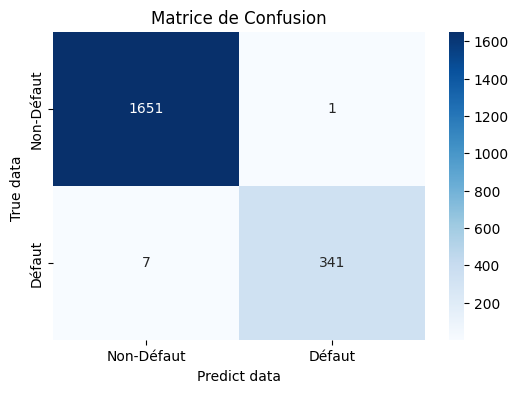

In [20]:
# Modélisation avec Logistic Regression
from sklearn.metrics import confusion_matrix

with mlflow.start_run():
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Évaluation du modèle
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    
    # Log des métriques dans MLflow
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_metric("accuracy", accuracy)

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Défaut", "Défaut"], yticklabels=["Non-Défaut", "Défaut"])
    plt.xlabel("Predict data")
    plt.ylabel("True data ")
    plt.title("Matrice de Confusion")
    plt.show()


In [21]:
import pickle

# Sauvegarder le modèle avec pickle
with open('loan_eligibility_model.pkl', 'wb') as f:
    pickle.dump(model, f)